<a href="https://colab.research.google.com/github/Ilyaas189/LAb-03-Bank_Classification/blob/main/Lab_03_Bank_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Classification**

**Loading the dataset**

In [3]:
import pandas as pd

dataset = pd.read_csv("bank-additional-full.csv",sep = ';')

**Encoding the Labels**

In [4]:
from sklearn.preprocessing import LabelEncoder
dataset = dataset.apply(LabelEncoder().fit_transform)

**To convert the dataset into dummy dataset**

In [5]:
df_dummies = pd.get_dummies(dataset)

**To drop the column of 'duration'**

In [6]:
df_dummies = df_dummies.drop('duration',axis = 1)

**To drop the rows with empty values**

In [7]:
df_dummies = df_dummies.dropna()

**Displaying the bar graph of the dataset**

In [ ]:
df_dummies.plot(kind = 'bar')

**To split the Features and Labels**

In [8]:
X = df_dummies.iloc[:,:-1]
y = df_dummies.iloc[:,-1]

**Splitting the Train and Test data with 80/20 ratio**

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

**Checking the shape for the model**

In [10]:
print("X_train:",X_train.shape,"y_train",y_train.shape)
print("X_test:",X_test.shape,"y_test",y_test.shape)

X_train: (32950, 19) y_train (32950,)
X_test: (8238, 19) y_test (8238,)


**Model Evaluation metrics selection for scores - I selected f1_macro** 

In [11]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

**Cross Validation of the model - With RandomForest Classifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(100,max_depth=3)

scores = cross_val_score(clf,X_train,y_train,cv = 10,scoring='f1_macro')

**Displaying the accuracy of the model**

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.61 accuracy with a standard deviation of 0.01


**Comparison with the Dummy Classifier**

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test)

0.8846807477543093

**Employing Grid Searching to obtain the optimized values of Hyper Parameters of the RandomForest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'max_depth': [1, 10, 100, 1000],
              'min_samples_split': [2,3,4,5], 
              'min_samples_leaf': [1, 2, 3, 4],
              } 
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.6s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 10.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

**Printing the optimum values of Hyper Parameters**

In [16]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Grid Search model Prediction**

In [17]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7288
           1       0.63      0.24      0.35       950

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



**Accuracy Scores for the test data**

In [20]:
from sklearn.metrics import accuracy_score  
accuracy_score(y_test, grid_predictions)

0.8962126729788784

**Plotting of the festures importance**

Text(0.5, 0, 'Relative Importance')

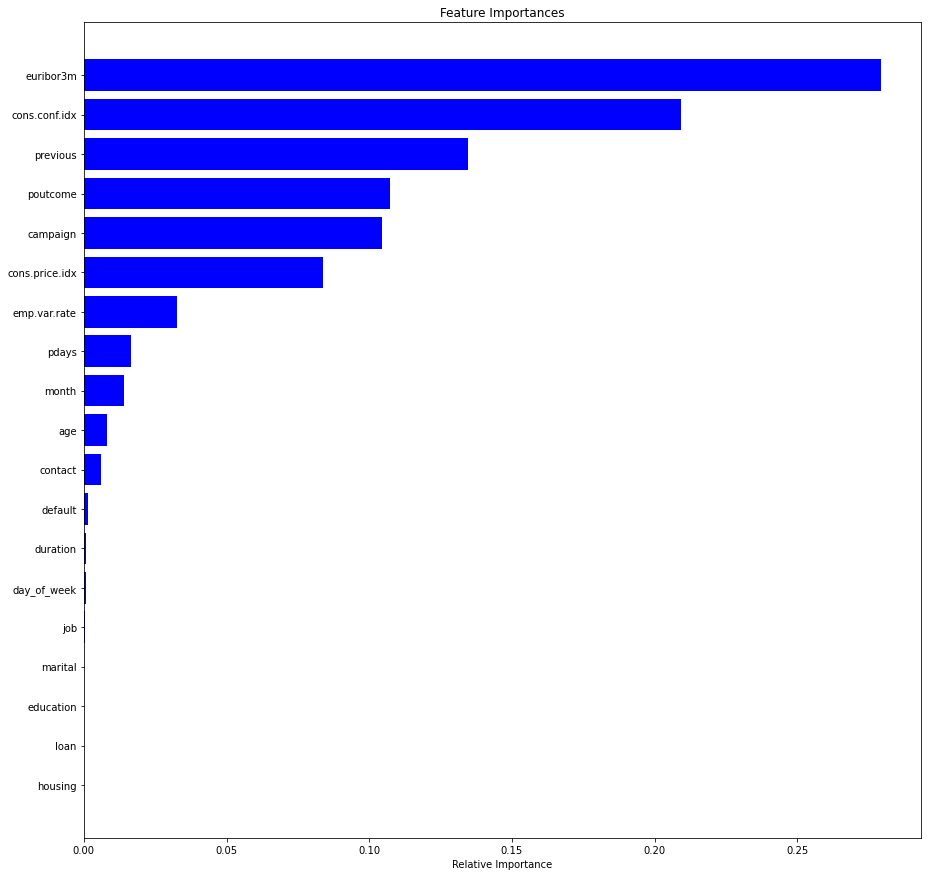

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

# get importances from RF
importances = clf.feature_importances_

# then sort them descending
indices = np.argsort(importances)

# get the features from the original data set
features = dataset.columns[0:50]

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

**Generalization error**

In [25]:
clf.fit(X_train, y_train).score(X_train, y_train)

0.9006373292867982

In [26]:
from sklearn.metrics import max_error
y_pred = clf.predict(X_test)
print("Error:" , max_error(y_test,y_pred))

Error: 1
